In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [3]:
movie_df = pd.read_csv('movie_dfr.csv')

In [4]:
movie_df.shape

(3293, 50)

### baseline model  - linear regression

numerical features

In [5]:
movie_df1 = movie_df.loc[:, ['yrs_since_release', 'runtime', 'votes', 'gross', 'rating']]

X = movie_df1.drop('rating', axis = 1)
X_ols = sm.add_constant(X)
y = movie_df1['rating']

model_n = sm.OLS(y, X_ols)
fit_n = model_n.fit()
fit_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     451.4
Date:                Sat, 12 Mar 2022   Prob (F-statistic):          1.91e-310
Time:                        21:51:47   Log-Likelihood:                -3596.1
No. Observations:                3293   AIC:                             7202.
Df Residuals:                    3288   BIC:                             7233.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1710      0.073     71.143      0.000       5.028       5.313
yrs_since_release     0.0160      0.001     17.076      0.000       0.014       0.018
runtime               0.0101      0.001     15.406      0.000       0.009       0.011
votes              1.941e-06   6.76e-08     28.702      0.000    1.81e-06    2.07e-06
gross                -0.0021      0.000    -11.755      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      748.584   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2628.181
Skew:                          -1.109   Prob(JB):                         0.00
Kurtosis:                       6.773   Cond. No.                     1.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

lr_n = LinearRegression()
lr_n.fit(X_train, y_train)
y_pred_train_1 = lr_n.predict(X_train)
print("R2 train: ", lr_n.score(X_train, y_train))
print("RMSE train: ", mean_squared_error(y_train, y_pred_train_1))

y_pred_test_1 = lr_n.predict(X_test)
print("R2 test: ", lr_n.score(X_test, y_test))
print("RMSE test: ", mean_squared_error(y_test, y_pred_test_1))

R2 train:  0.3558155509231118
RMSE train:  0.4929969059595019
R2 test:  0.3501006750673985
RMSE test:  0.5847677139817105


#### numerical and categorical

In [7]:
X2 = movie_df.drop('rating', axis=1)
X2_ols = sm.add_constant(X2)
y2 = movie_df['rating']

model_nc = sm.OLS(y2, X2_ols)
fit_nc = model_nc.fit()
fit_nc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     70.18
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:51:52   Log-Likelihood:                -3126.5
No. Observations:                3293   AIC:                             6353.
Df Residuals:                    3243   BIC:                             6658.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3723      0.096     56.148      0.000       5.185       5.560
runtime                0.0077      0.001     11.155      0.000       0.006       0.009
votes               1.951e-06   6.37e-08     30.630      0.000    1.83e-06    2.08e-06
gross                 -0.0012      0.000     -6.863      0.000      -0.002      -0.001
yrs_since_release      0.0155      0.001     17.575      0.000       0.014       0.017
certificate_PG-13     -0.0658      0.032     -2.064      0.039      -0.128      -0.003
certificate_R         -0.0394      0.028     -1.398      0.162      -0.095       0.016
Action                -0.1752      0.033     -5.303      0.000      -0.240      -0.110
Adventure             -0.1441      0.036     -4.023      0.000      -0.214      -0.074
Animation              0.7001      0.056     12.455      0.000       0.590       0.810
Biography              0.2196      0.048      4.537      0.000       0.125       0.314
Comedy                -0.0693      0.035     -1.963      0.050      -0.138   -8.37e-05
Crime                 -0.0184      0.034     -0.547      0.585      -0.084       0.048
Documentary            0.9166      0.142      6.442      0.000       0.638       1.196
Drama                  0.3960      0.033     12.028      0.000       0.331       0.461
Family                -0.0377      0.055     -0.686      0.492      -0.146       0.070
Fantasy               -0.2296      0.042     -5.482      0.000      -0.312      -0.147
Film-Noir              0.2237      0.229      0.977      0.329      -0.225       0.672
History                0.0031      0.072      0.043      0.966      -0.138       0.144
Horror                -0.2464      0.046     -5.403      0.000      -0.336      -0.157
Music                  0.0521      0.074      0.708      0.479      -0.092       0.196
Musical                0.2305      0.114      2.024      0.043       0.007       0.454
Mystery               -0.0131      0.041     -0.318      0.751      -0.094       0.068
News                   0.5338      0.646      0.826      0.409      -0.733       1.801
Romance               -0.1263      0.038     -3.290      0.001      -0.202      -0.051
Sci-Fi                -0.1795      0.043     -4.215      0.000      -0.263      -0.096
Sport                 -0.0421      0.079     -0.530      0.596      -0.198       0.113
Thriller               0.0146      0.036      0.403      0.687      -0.056       0.086
War                    0.1021      0.088      1.161      0.246      -0.070       0.275
Western                0.1863      0.132      1.416      0.157      -0.072       0.444
Steven Spielberg       0.0324      0.122      0.265      0.791      -0.207       0.272
Clint Eastwood         0.0569      0.138      0.414      0.679      -0.213       0.326
Martin Scorsese       -0.2874      0.1

In [8]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=50)

lr_2 = LinearRegression()
lr_2.fit(X2_train, y2_train)
y_pred_train_2 = lr_2.predict(X2_train)
print('R2 train: ', lr_2.score(X2_train, y2_train))
print('RMSE train: ', mean_squared_error(y2_train, y_pred_train_2))

y_pred_test_2 = lr_2.predict(X2_test)
print('R2 test: ', lr_2.score(X2_test, y2_test))
print('RMSE test: ', mean_squared_error(y2_test, y_pred_test_2))

R2 train:  0.517954468203345
RMSE train:  0.3689113514737899
R2 test:  0.4958687076035617
RMSE test:  0.45360826222104933


#### numerical and categorical - subst 

not including: History, Tony Scott, Robert Zemeckis, Steven Spielberg, Mystery, Thriller, Clint Eastwood,  Shawn Levy

In [9]:
movie_df.columns

Index(['runtime', 'rating', 'votes', 'gross', 'yrs_since_release',
       'certificate_PG-13', 'certificate_R', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western', 'Steven Spielberg', 'Clint Eastwood',
       'Martin Scorsese', 'Ron Howard', 'Ridley Scott', 'Woody Allen',
       'Tim Burton', 'Robert Zemeckis', 'Tony Scott', 'Alfred Hitchcock',
       'Oliver Stone', 'Michael Bay', 'Steven Soderbergh', 'Richard Donner',
       'John Carpenter', 'M. Night Shyamalan', 'Sam Raimi', 'Joel Schumacher',
       'Christopher Nolan', 'Shawn Levy'],
      dtype='object')

In [10]:
movie_df3 = movie_df.loc[:, ['runtime', 'rating', 'votes', 'gross', 'yrs_since_release', 'certificate_PG-13', 
                             'certificate_R', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 
                             'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 
                             'Music', 'Musical', 'News', 'Romance', 'Sci-Fi', 'Sport', 'War', 
                             'Western',  'Martin Scorsese', 'Ron Howard', 'Ridley Scott', 'Woody Allen', 
                             'Tim Burton', 'Alfred Hitchcock', 'Oliver Stone', 'Michael Bay', 
                             'Steven Soderbergh', 'Richard Donner', 'John Carpenter', 'M. Night Shyamalan', 
                             'Sam Raimi', 'Joel Schumacher', 'Christopher Nolan']]

X3 = movie_df3.drop('rating', axis = 1)
X3_ols = sm.add_constant(X3)
y3 = movie_df3['rating']

model_3 = sm.OLS(y3, X3_ols)
fit_3 = model_3.fit()
fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     84.04
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:51:59   Log-Likelihood:                -3126.9
No. Observations:                3293   AIC:                             6338.
Df Residuals:                    3251   BIC:                             6594.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3774      0.087     61.869      0.000       5.207       5.548
runtime                0.0077      0.001     11.322      0.000       0.006       0.009
votes               1.951e-06   6.33e-08     30.836      0.000    1.83e-06    2.07e-06
gross                 -0.0012      0.000     -6.869      0.000      -0.002      -0.001
yrs_since_release      0.0155      0.001     17.736      0.000       0.014       0.017
certificate_PG-13     -0.0657      0.032     -2.068      0.039      -0.128      -0.003
certificate_R         -0.0393      0.028     -1.399      0.162      -0.094       0.016
Action                -0.1739      0.031     -5.565      0.000      -0.235      -0.113
Adventure             -0.1474      0.034     -4.340      0.000      -0.214      -0.081
Animation              0.6999      0.055     12.674      0.000       0.592       0.808
Biography              0.2192      0.046      4.767      0.000       0.129       0.309
Comedy                -0.0742      0.029     -2.515      0.012      -0.132      -0.016
Crime                 -0.0197      0.033     -0.603      0.546      -0.084       0.044
Documentary            0.9122      0.141      6.473      0.000       0.636       1.188
Drama                  0.3929      0.030     13.007      0.000       0.334       0.452
Family                -0.0412      0.054     -0.766      0.444      -0.147       0.064
Fantasy               -0.2318      0.040     -5.807      0.000      -0.310      -0.154
Film-Noir              0.2146      0.228      0.941      0.347      -0.232       0.662
Horror                -0.2510      0.045     -5.627      0.000      -0.338      -0.164
Music                  0.0501      0.073      0.690      0.490      -0.092       0.192
Musical                0.2288      0.113      2.020      0.043       0.007       0.451
News                   0.5313      0.645      0.824      0.410      -0.734       1.796
Romance               -0.1283      0.036     -3.527      0.000      -0.200      -0.057
Sci-Fi                -0.1829      0.041     -4.499      0.000      -0.263      -0.103
Sport                 -0.0442      0.078     -0.569      0.569      -0.197       0.108
War                    0.1001      0.087      1.150      0.250      -0.071       0.271
Western                0.1908      0.128      1.485      0.138      -0.061       0.443
Martin Scorsese       -0.2872      0.148     -1.944      0.052      -0.577       0.002
Ron Howard            -0.0790      0.146     -0.543      0.587      -0.364       0.206
Ridley Scott          -0.2729      0.146     -1.869      0.062      -0.559       0.013
Woody Allen            0.5129      0.155      3.315      0.001       0.210       0.816
Tim Burton             0.1755      0.154      1.138      0.255      -0.127       0.478
Alfred Hitchcock       0.1047      0.1

In [11]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=50)

lr_3 = LinearRegression()
lr_3.fit(X3_train, y3_train)
y_pred_train_3 = lr_3.predict(X3_train)
print('R2 train: ', lr_3.score(X3_train, y3_train))
print('RMSE train: ', mean_squared_error(y3_train, y_pred_train_3))

y_pred_test_3 = lr_3.predict(X3_test)
print('R2 test: ', lr_3.score(X3_test, y3_test))
print('RMSE test: ', mean_squared_error(y3_test, y_pred_test_3))

R2 train:  0.5175736255774701
RMSE train:  0.3692028118412093
R2 test:  0.49735701344811356
RMSE test:  0.4522691114125538


#### numerical and categorical - another subset 

In [12]:
movie_df4 = movie_df.loc[:, ['runtime', 'rating', 'votes', 'gross', 'yrs_since_release', 'certificate_PG-13', 
                             'certificate_R', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 
                             'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 
                             'Music', 'Musical', 'News', 'Romance', 'Sci-Fi', 'War', 'Western',  
                             'Martin Scorsese', 'Ridley Scott', 'Woody Allen', 'Tim Burton', 
                             'Alfred Hitchcock', 'Oliver Stone', 'Michael Bay', 'Richard Donner', 
                             'John Carpenter', 'M. Night Shyamalan', 'Sam Raimi', 'Joel Schumacher', 
                             'Christopher Nolan']]

X4 = movie_df4.drop('rating', axis = 1)
X4_ols = sm.add_constant(X4)
y4 = movie_df4['rating']

model_4 = sm.OLS(y4, X4_ols)
fit_4 = model_4.fit()
fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     90.71
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:52:02   Log-Likelihood:                -3127.4
No. Observations:                3293   AIC:                             6333.
Df Residuals:                    3254   BIC:                             6571.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3736      0.087     62.078      0.000       5.204       5.543
runtime                0.0077      0.001     11.309      0.000       0.006       0.009
votes               1.954e-06   6.31e-08     30.964      0.000    1.83e-06    2.08e-06
gross                 -0.0012      0.000     -6.940      0.000      -0.002      -0.001
yrs_since_release      0.0155      0.001     17.735      0.000       0.014       0.017
certificate_PG-13     -0.0650      0.032     -2.047      0.041      -0.127      -0.003
certificate_R         -0.0387      0.028     -1.379      0.168      -0.094       0.016
Action                -0.1727      0.031     -5.536      0.000      -0.234      -0.112
Adventure             -0.1449      0.034     -4.292      0.000      -0.211      -0.079
Animation              0.7022      0.055     12.734      0.000       0.594       0.810
Biography              0.2179      0.046      4.749      0.000       0.128       0.308
Comedy                -0.0728      0.029     -2.476      0.013      -0.131      -0.015
Crime                 -0.0172      0.032     -0.533      0.594      -0.081       0.046
Documentary            0.9137      0.141      6.487      0.000       0.638       1.190
Drama                  0.3933      0.030     13.028      0.000       0.334       0.453
Family                -0.0400      0.054     -0.744      0.457      -0.145       0.065
Fantasy               -0.2300      0.040     -5.775      0.000      -0.308      -0.152
Film-Noir              0.2171      0.228      0.952      0.341      -0.230       0.664
Horror                -0.2475      0.044     -5.584      0.000      -0.334      -0.161
Music                  0.0538      0.072      0.744      0.457      -0.088       0.196
Musical                0.2307      0.113      2.037      0.042       0.009       0.453
News                   0.5347      0.645      0.829      0.407      -0.730       1.799
Romance               -0.1253      0.036     -3.467      0.001      -0.196      -0.054
Sci-Fi                -0.1808      0.041     -4.460      0.000      -0.260      -0.101
War                    0.1046      0.087      1.205      0.228      -0.066       0.275
Western                0.1950      0.128      1.520      0.129      -0.057       0.447
Martin Scorsese       -0.2886      0.148     -1.956      0.051      -0.578       0.001
Ridley Scott          -0.2713      0.146     -1.860      0.063      -0.557       0.015
Woody Allen            0.5137      0.155      3.322      0.001       0.211       0.817
Tim Burton             0.1767      0.154      1.147      0.252      -0.125       0.479
Alfred Hitchcock       0.1078      0.184      0.586      0.558      -0.253       0.468
Oliver Stone          -0.4680      0.177     -2.649      0.008      -0.814      -0.122
Michael Bay           -0.2876      0.1

In [13]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=50)

lr_4 = LinearRegression()
lr_4.fit(X4_train, y4_train)
y_pred_train_4 = lr_4.predict(X4_train)
print('R2 train: ', lr_4.score(X4_train, y4_train))
print('RMSE train: ', mean_squared_error(y4_train, y_pred_train_4))

y_pred_test_4 = lr_4.predict(X4_test)
print('R2 test: ', lr_4.score(X4_test, y4_test))
print('RMSE test: ', mean_squared_error(y4_test, y_pred_test_4))

R2 train:  0.5173975962217147
RMSE train:  0.36933752780318235
R2 test:  0.497584146481299
RMSE test:  0.4520647411978297


#### baseline vs other models

In [45]:
df_columns = ['runtime', 'rating', 'votes', 'gross', 'yrs_since_release', 'certificate_PG-13', 
              'certificate_R', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
              'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical', 
              'News', 'Romance', 'Sci-Fi', 'War', 'Western', 'Martin Scorsese', 'Ridley Scott', 
              'Woody Allen', 'Tim Burton', 'Alfred Hitchcock', 'Oliver Stone', 'Michael Bay', 
              'Richard Donner', 'John Carpenter', 'M. Night Shyamalan', 'Sam Raimi', 'Joel Schumacher', 
              'Christopher Nolan']

model_df = movie_df.loc[:, df_columns]
X = model_df.drop('rating', axis=1)
y = model_df.rating

# split into sets
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split training data into multiple folds
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# cross validation starts
X, y = np.array(X), np.array(y)
#collect the validation results for all models
cv_lm_r2s, cv_lm_rid_r2s, cv_lm_lasso_r2s, cv_lm_poly_r2s = [], [], [], [] 

cv_lm_r2s_tr, cv_lm_rid_r2s_tr, cv_lm_lasso_r2s_tr, cv_lm_poly_r2s_tr = [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # models
    lm = LinearRegression()
    lm_rid = Ridge(alpha=1)
    lm_lasso = Lasso(alpha=0.005)
    lm_poly = LinearRegression()
    
    # scaling for train, val, test 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # linear
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))    
    lm_train_preds = lm.predict(X_train)
    linear_train_rmse = mean_squared_error(y_train, lm_train_preds)
    linear_train_mae = mean_absolute_error(y_train, lm_train_preds)
    
    lm_val_preds = lm.predict(X_val)
    linear_val_rmse = mean_squared_error(y_val, lm_val_preds)
    linear_val_mae = mean_absolute_error(y_val, lm_val_preds)
    
    
    # ridge
    lm_rid.fit(X_train_scaled, y_train)
    cv_lm_rid_r2s.append(lm_rid.score(X_val_scaled, y_val))
    cv_lm_rid_r2s_tr.append(lm_rid.score(X_train_scaled, y_train))
    
    rid_train_preds = lm_rid.predict(X_train_scaled)
    ridge_train_rmse = mean_squared_error(y_train, rid_train_preds)
    ridge_train_mae = mean_absolute_error(y_train, rid_train_preds)
    
    rid_val_preds = lm_rid.predict(X_val_scaled)
    ridge_val_rmse = mean_squared_error(y_val, rid_val_preds)
    ridge_val_mae = mean_absolute_error(y_val, rid_val_preds)
    
    # lasso
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_scaled, y_val))
    cv_lm_lasso_r2s_tr.append(lm_lasso.score(X_train_scaled, y_train))
    
    lasso_train_preds = lm_lasso.predict(X_train_scaled)
    lasso_train_rmse = mean_squared_error(y_train, lasso_train_preds)
    lasso_train_mae = mean_absolute_error(y_train, lasso_train_preds)
    
    lasso_val_preds = lm_lasso.predict(X_val_scaled)
    lasso_val_rmse = mean_squared_error(y_val, lasso_val_preds)
    lasso_val_mae = mean_absolute_error(y_val, lasso_val_preds)
        
    # poly model
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    cv_lm_poly_r2s_tr.append(lm_poly.score(X_train_poly, y_train))
    
    poly_train_preds = lm_poly.predict(X_train_poly)
    poly_train_rmse = mean_squared_error(y_train, poly_train_preds)
    poly_train_mae = mean_absolute_error(y_train, poly_train_preds)
    
    poly_val_preds = lm_poly.predict(X_val_poly)
    poly_val_rmse = mean_squared_error(y_val, poly_val_preds)
    poly_val_mae = mean_absolute_error(y_val, poly_val_preds)
    

print('Training set: ', '\n')
print('simple regression scores: ', cv_lm_r2s_tr)
print('simple RMSE: ', linear_train_rmse)
print('simple MAE: ', linear_train_mae, '\n')

print('ridge scores: ', cv_lm_rid_r2s_tr)
print('ridge RMSE: ', ridge_train_rmse)
print('ridge MAE: ', ridge_train_mae, '\n')

print('lasso scores: ', cv_lm_lasso_r2s_tr)
print('lasso RMSE: ', lasso_train_rmse)
print('lasso MAE: ', lasso_train_mae, '\n')

print('poly scores: ', cv_lm_poly_r2s_tr)
print('poly RMSE: ', poly_train_rmse)
print('poly MAE: ', poly_train_mae, '\n')

print('Val set: ', '\n')
print('simple regression scores: ', cv_lm_r2s)
print('simple RMSE: ', linear_val_rmse)
print('simple MAE: ', linear_val_mae, '\n')

print('ridge scores: ', cv_lm_rid_r2s)
print('ridge RMSE: ', ridge_val_rmse)
print('ridge MAE: ', ridge_val_mae, '\n')

print('lasso scores: ', cv_lm_lasso_r2s)
print('lasso RMSE: ', lasso_val_rmse)
print('lasso MAE: ', lasso_val_mae, '\n')

print('Poly scores: ', cv_lm_poly_r2s)
print('Poly RMSE: ', poly_val_rmse)
print('Poly MAE: ', poly_val_mae, '\n')

Training set:  

simple regression scores:  [0.5335569447649865, 0.518258293084872, 0.5278552741380831, 0.5216061071566196, 0.5150354589192558]
simple RMSE:  0.3865102764146871
simple MAE:  0.4592352307408031 

ridge scores:  [0.533556744478888, 0.5182580966763837, 0.5278550872490984, 0.5216059099380028, 0.5150352647745224]
ridge RMSE:  0.3865104311454524
ridge MAE:  0.45924452947776606 

lasso scores:  [0.5320276518574737, 0.5168940571047947, 0.5263504607124367, 0.5202209493135503, 0.5135507251172258]
lasso RMSE:  0.38769358946876326
lasso MAE:  0.45991226460792256 

poly scores:  [0.4708342871020732, 0.6817578616103779, 0.680737122962694, 0.6766362834579978, 0.5791091957091521]
poly RMSE:  0.3354443620647523
poly MAE:  0.4301773658864211 

Val set:  

simple regression scores:  [0.4714950761329443, 0.52809509908417, 0.48557981694820596, 0.5144022966533345, 0.5410859445212699]
simple RMSE:  0.3514994118014472
simple MAE:  0.4197072274952082 

ridge scores:  [0.47145830246556164, 0.528

test

In [15]:
#test - linear
lm.fit(X, y)
lm_preds = lm.predict(X_test)

linear_test_rmse = mean_squared_error(y_test, lm_preds, squared=False)
linear_test_mae = mean_absolute_error(y_test, lm_preds)
linear_test_r2 = lm.score(X_test, y_test)

#test - Ridge
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
    
lm_rid.fit(X_scaled, y)
ridge_preds = lm_rid.predict(X_test_scaled)

ridge_test_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
ridge_test_mae = mean_absolute_error(y_test, ridge_preds)
ridge_test_r2 = lm_rid.score(X_test_scaled, y_test)

#test - Lasso
lm_lasso.fit(X_scaled, y)
lasso_preds = lm_lasso.predict(X_test_scaled)

lasso_test_rmse = mean_squared_error(y_test, lasso_preds, squared=False)
lasso_test_mae = mean_absolute_error(y_test, lasso_preds)
lasso_test_r2 = lm_lasso.score(X_test_scaled, y_test)

#test - poly
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

lm_poly.fit(X_poly, y)
poly_preds = lm_poly.predict(X_test_poly)

poly_test_rmse = mean_squared_error(y_test, poly_preds, squared=False)
poly_test_mae = mean_absolute_error(y_test, poly_preds)
poly_test_r2 = lm_poly.score(X_test_poly, y_test)

column_list = ['Model_Type', 'R-squared', 'RMSE', 'MAE']

linear_dict = dict(zip(column_list, ['Simple Linear', linear_test_r2, linear_test_rmse, linear_test_mae]))
ridge_dict = dict(zip(column_list, ['Ridge', ridge_test_r2, ridge_test_rmse, ridge_test_mae]))
lasso_dict = dict(zip(column_list, ['LASSO', lasso_test_r2, lasso_test_rmse, lasso_test_mae]))
poly_dict = dict(zip(column_list, ['Polynomial', poly_test_r2, poly_test_rmse, poly_test_mae]))

score_df = pd.DataFrame([linear_dict, ridge_dict, lasso_dict, poly_dict])
score_df

,Model_Type,R-squared,RMSE,MAE
0,Simple Linear,0.472582,0.673093,0.491777
1,Ridge,0.472640,0.673056,0.491781
2,LASSO,0.476980,0.670281,0.490593
3,Polynomial,0.025653,0.914860,0.600832


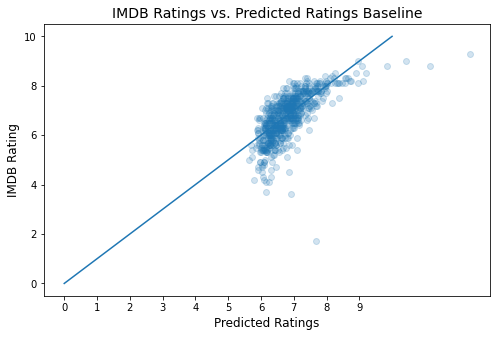

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(lm_preds, y_test, alpha=0.2)
plt.plot([0,10], [0,10])
plt.title('IMDB Ratings vs. Predicted Ratings Baseline', fontsize=14)
plt.xticks(np.arange(0, 10, step=1))
plt.xlabel('Predicted Ratings', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)
plt.savefig('Baseline.png');

Lasso has a high r-squared value and low MAE 

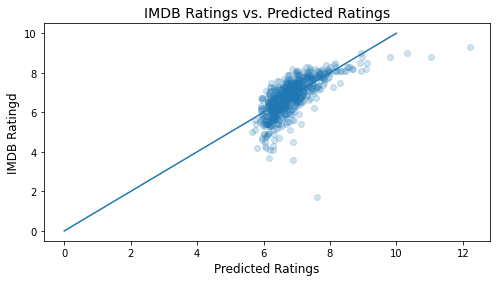

In [17]:
plt.figure(figsize=(8,4))
plt.scatter(lasso_preds, y_test, alpha=0.2)
plt.plot([0,10], [0,10])
plt.title('IMDB Ratings vs. Predicted Ratings', fontsize=14)
plt.xlabel('Predicted Ratings', fontsize=12)
plt.ylabel('IMDB Ratingd', fontsize=12)
plt.savefig('IMDB Final model.png')

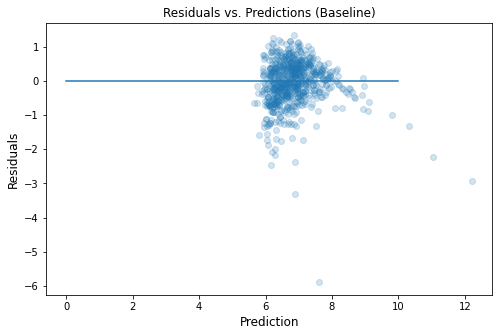

In [24]:
residuals = y_test - lasso_preds
plt.figure(figsize=(8, 5))
plt.scatter(lasso_preds, residuals, alpha=0.2)
plt.plot([0,10], [0,0])
plt.title("Residuals vs. Predictions (Baseline)")
plt.xlabel("Prediction", size=12)
plt.ylabel("Residuals", size=12)
plt.savefig('residual_finalmodel.png');

#### diagnostic_plot check

In [73]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y)
#     plt.plot([0,4.5],[0,4.5])
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.plot([0,10],[0,0])
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot") #quantile to quantile plot 

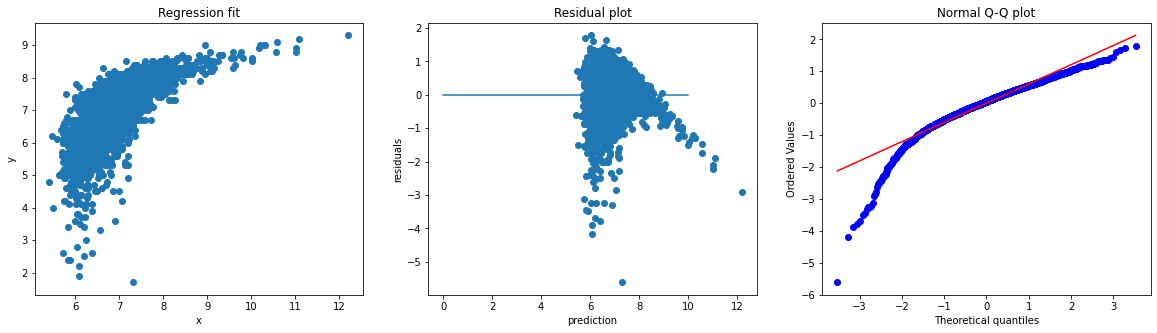

In [74]:
x = model_df.drop('rating', axis=1)
y = model_df.rating

diagnostic_plot(X, y)
plt.savefig('diagnostic_plots.png');

### Lasso Features Analysis

In [48]:
# Lasso Feature Selection

XL = model_df.drop('rating', axis=1)
yL = model_df.rating

reg = LassoCV()
reg.fit(XL, yL)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(XL,yL))

coef = pd.Series(reg.coef_ , index=XL.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 93.659798
Best score using built-in LassoCV: 0.207707
Lasso picked 1 variables and eliminated the other 37 variables


Text(0.5, 0, 'Coefficient')

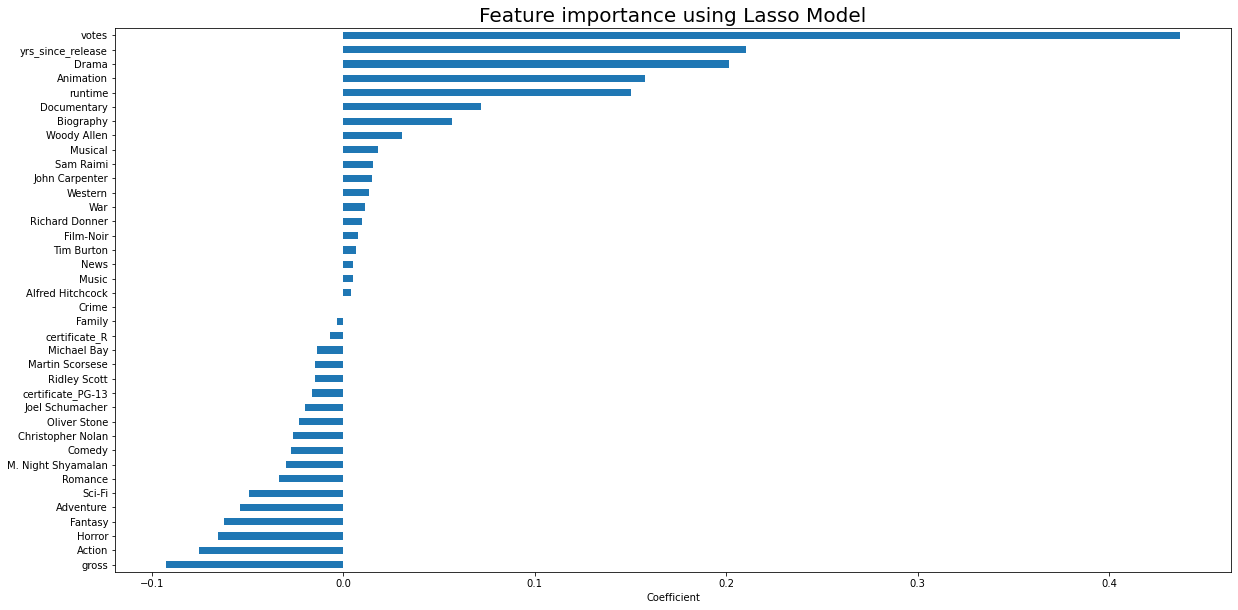

In [55]:
noz_coef = coef #[coef != 0]
lmp_coef = noz_coef.sort_values()
neg_coef = abs(lmp_coef[lmp_coef < 0]).sort_values()
pos_coef = lmp_coef[lmp_coef > 0]
plt.rcParams['figure.figsize'] = (20.0, 10.0)
lmp_coef.plot(kind='barh')
plt.title("Feature importance using Lasso Model", size=20)
plt.xlabel("Coefficient")

### Predicting on new movies using the entire dataset 

In [52]:
# Whole dataset training with lasso
X, y = model_df.drop('rating', axis=1), movie_df.rating

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lm_lasso.fit(X_scaled, y)
lasso_preds = lm_lasso.predict(X_scaled)

lasso_test_rmse = mean_squared_error(y, lasso_preds, squared=False)
lasso_test_mae = mean_absolute_error(y, lasso_preds)
lasso_test_r2 = lm_lasso.score(X_scaled, y)

print(lasso_test_r2)
print(lasso_test_rmse)
print(lasso_test_mae)

0.5130732561718276
0.6263333761495622
0.4603182748207048


In [53]:
coef = pd.Series(lm_lasso.coef_ , index=XL.columns)
coef

runtime               0.150350
votes                 0.437231
gross                -0.092585
yrs_since_release     0.210429
certificate_PG-13    -0.016161
certificate_R        -0.006603
Action               -0.075017
Adventure            -0.053871
Animation             0.157573
Biography             0.056711
Comedy               -0.027279
Crime                -0.000000
Documentary           0.071844
Drama                 0.201371
Family               -0.003057
Fantasy              -0.062409
Film-Noir             0.007731
Horror               -0.065281
Music                 0.005081
Musical               0.018217
News                  0.005272
Romance              -0.033684
Sci-Fi               -0.049009
War                   0.011512
Western               0.013784
Martin Scorsese      -0.014564
Ridley Scott         -0.014747
Woody Allen           0.030783
Tim Burton            0.006800
Alfred Hitchcock      0.004362
Oliver Stone         -0.022818
Michael Bay          -0.013612
Richard 